In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
aapl_df = yf.download("AAPL", start='2020-01-01', end='2022-01-01')
aapl_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02 00:00:00-05:00,74.059998,75.150002,73.797501,75.087502,73.683578,135480400
2020-01-03 00:00:00-05:00,74.287498,75.144997,74.125000,74.357498,72.967201,146322800
2020-01-06 00:00:00-05:00,73.447502,74.989998,73.187500,74.949997,73.548637,118387200
2020-01-07 00:00:00-05:00,74.959999,75.224998,74.370003,74.597504,73.202744,108872000
2020-01-08 00:00:00-05:00,74.290001,76.110001,74.290001,75.797501,74.380295,132079200
...,...,...,...,...,...,...
2021-12-27 00:00:00-05:00,177.089996,180.419998,177.070007,180.330002,179.586868,74919600
2021-12-28 00:00:00-05:00,180.160004,181.330002,178.529999,179.289993,178.551132,79144300
2021-12-29 00:00:00-05:00,179.330002,180.630005,178.139999,179.380005,178.640778,62348900


In [3]:
aapl_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,505.000000,505.000000,505.000000,505.000000,505.000000,5.050000e+02
mean,118.019624,119.459560,116.648331,118.123030,117.006967,1.241110e+08
std,29.455228,29.586384,29.270541,29.439688,29.563856,6.315499e+07
min,57.020000,57.125000,53.152500,56.092499,55.174355,4.100000e+07
25%,91.279999,92.970001,90.910004,91.632500,90.376610,8.086110e+07
50%,123.750000,125.180000,122.209999,123.750000,122.667809,1.088292e+08
75%,140.070007,142.210007,138.369995,141.110001,140.323700,1.477512e+08
max,181.119995,182.130005,178.529999,180.330002,179.586868,4.265100e+08


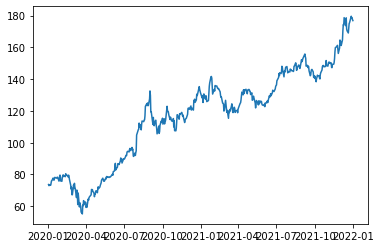

In [4]:
plt.plot(
        aapl_df.index,
        aapl_df['Adj Close']
)

In [5]:
ma = 5
column_name = "MA for %s days" %(str(ma))    
aapl_df[column_name] = aapl_df['Adj Close'].rolling(window=ma).mean()
aapl_df

,Open,High,Low,Close,Adj Close,Volume,MA for 5 days
Date,,,,,,,
2020-01-02 00:00:00-05:00,74.059998,75.150002,73.797501,75.087502,73.683578,135480400,NaN
2020-01-03 00:00:00-05:00,74.287498,75.144997,74.125000,74.357498,72.967201,146322800,NaN
2020-01-06 00:00:00-05:00,73.447502,74.989998,73.187500,74.949997,73.548637,118387200,NaN
2020-01-07 00:00:00-05:00,74.959999,75.224998,74.370003,74.597504,73.202744,108872000,NaN
2020-01-08 00:00:00-05:00,74.290001,76.110001,74.290001,75.797501,74.380295,132079200,73.556491
...,...,...,...,...,...,...,...
2021-12-27 00:00:00-05:00,177.089996,180.419998,177.070007,180.330002,179.586868,74919600,174.276834
2021-12-28 00:00:00-05:00,180.160004,181.330002,178.529999,179.289993,178.551132,79144300,176.176968
2021-12-29 00:00:00-05:00,179.330002,180.630005,178.139999,179.380005,178.640778,62348900,177.449704


In [6]:
ma = 20
column_name = "MA for %s days" %(str(ma))    
aapl_df[column_name] = aapl_df['Adj Close'].rolling(window=ma).mean()
aapl_df

,Open,High,Low,Close,Adj Close,Volume,MA for 5 days,MA for 20 days
Date,,,,,,,,
2020-01-02 00:00:00-05:00,74.059998,75.150002,73.797501,75.087502,73.683578,135480400,NaN,NaN
2020-01-03 00:00:00-05:00,74.287498,75.144997,74.125000,74.357498,72.967201,146322800,NaN,NaN
2020-01-06 00:00:00-05:00,73.447502,74.989998,73.187500,74.949997,73.548637,118387200,NaN,NaN
2020-01-07 00:00:00-05:00,74.959999,75.224998,74.370003,74.597504,73.202744,108872000,NaN,NaN
2020-01-08 00:00:00-05:00,74.290001,76.110001,74.290001,75.797501,74.380295,132079200,73.556491,NaN
...,...,...,...,...,...,...,...,...
2021-12-27 00:00:00-05:00,177.089996,180.419998,177.070007,180.330002,179.586868,74919600,174.276834,170.756403
2021-12-28 00:00:00-05:00,180.160004,181.330002,178.529999,179.289993,178.551132,79144300,176.176968,171.704977
2021-12-29 00:00:00-05:00,179.330002,180.630005,178.139999,179.380005,178.640778,62348900,177.449704,172.406076


In [7]:
ma = 60
column_name = "MA for %s days" %(str(ma))    
aapl_df[column_name] = aapl_df['Adj Close'].rolling(window=ma).mean()
aapl_df

,Open,High,Low,Close,Adj Close,Volume,MA for 5 days,MA for 20 days,MA for 60 days
Date,,,,,,,,,
2020-01-02 00:00:00-05:00,74.059998,75.150002,73.797501,75.087502,73.683578,135480400,NaN,NaN,NaN
2020-01-03 00:00:00-05:00,74.287498,75.144997,74.125000,74.357498,72.967201,146322800,NaN,NaN,NaN
2020-01-06 00:00:00-05:00,73.447502,74.989998,73.187500,74.949997,73.548637,118387200,NaN,NaN,NaN
2020-01-07 00:00:00-05:00,74.959999,75.224998,74.370003,74.597504,73.202744,108872000,NaN,NaN,NaN
2020-01-08 00:00:00-05:00,74.290001,76.110001,74.290001,75.797501,74.380295,132079200,73.556491,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-12-27 00:00:00-05:00,177.089996,180.419998,177.070007,180.330002,179.586868,74919600,174.276834,170.756403,155.931392
2021-12-28 00:00:00-05:00,180.160004,181.330002,178.529999,179.289993,178.551132,79144300,176.176968,171.704977,156.542993
2021-12-29 00:00:00-05:00,179.330002,180.630005,178.139999,179.380005,178.640778,62348900,177.449704,172.406076,157.214262


In [8]:
def compare_open_and_close_price(open_price, close_price):
    return 'red' if open_price > close_price else 'blue'

aapl_df['color'] = aapl_df.apply(lambda x: compare_open_and_close_price(x['Open'], x['Close']), axis=1)
aapl_df

,Open,High,Low,Close,Adj Close,Volume,MA for 5 days,MA for 20 days,MA for 60 days,color
Date,,,,,,,,,,
2020-01-02 00:00:00-05:00,74.059998,75.150002,73.797501,75.087502,73.683578,135480400,NaN,NaN,NaN,blue
2020-01-03 00:00:00-05:00,74.287498,75.144997,74.125000,74.357498,72.967201,146322800,NaN,NaN,NaN,blue
2020-01-06 00:00:00-05:00,73.447502,74.989998,73.187500,74.949997,73.548637,118387200,NaN,NaN,NaN,blue
2020-01-07 00:00:00-05:00,74.959999,75.224998,74.370003,74.597504,73.202744,108872000,NaN,NaN,NaN,red
2020-01-08 00:00:00-05:00,74.290001,76.110001,74.290001,75.797501,74.380295,132079200,73.556491,NaN,NaN,blue
...,...,...,...,...,...,...,...,...,...,...
2021-12-27 00:00:00-05:00,177.089996,180.419998,177.070007,180.330002,179.586868,74919600,174.276834,170.756403,155.931392,blue
2021-12-28 00:00:00-05:00,180.160004,181.330002,178.529999,179.289993,178.551132,79144300,176.176968,171.704977,156.542993,red
2021-12-29 00:00:00-05:00,179.330002,180.630005,178.139999,179.380005,178.640778,62348900,177.449704,172.406076,157.214262,blue


In [9]:
aapl_df = aapl_df.rename(columns = {'Adj Close' : 'MA for 1 days'})
aapl_df

,Open,High,Low,Close,MA for 1 days,Volume,MA for 5 days,MA for 20 days,MA for 60 days,color
Date,,,,,,,,,,
2020-01-02 00:00:00-05:00,74.059998,75.150002,73.797501,75.087502,73.683578,135480400,NaN,NaN,NaN,blue
2020-01-03 00:00:00-05:00,74.287498,75.144997,74.125000,74.357498,72.967201,146322800,NaN,NaN,NaN,blue
2020-01-06 00:00:00-05:00,73.447502,74.989998,73.187500,74.949997,73.548637,118387200,NaN,NaN,NaN,blue
2020-01-07 00:00:00-05:00,74.959999,75.224998,74.370003,74.597504,73.202744,108872000,NaN,NaN,NaN,red
2020-01-08 00:00:00-05:00,74.290001,76.110001,74.290001,75.797501,74.380295,132079200,73.556491,NaN,NaN,blue
...,...,...,...,...,...,...,...,...,...,...
2021-12-27 00:00:00-05:00,177.089996,180.419998,177.070007,180.330002,179.586868,74919600,174.276834,170.756403,155.931392,blue
2021-12-28 00:00:00-05:00,180.160004,181.330002,178.529999,179.289993,178.551132,79144300,176.176968,171.704977,156.542993,red
2021-12-29 00:00:00-05:00,179.330002,180.630005,178.139999,179.380005,178.640778,62348900,177.449704,172.406076,157.214262,blue


In [10]:
colors = {'red': '#ff207c', 'grey': '#42535b', 'blue': '#207cff', 'orange': '#ffa320', 'green': '#00ec8b'}

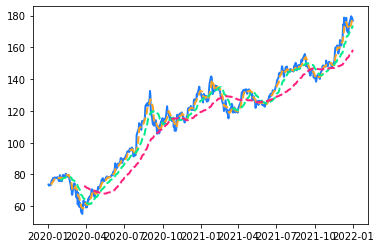

In [11]:
mov_avg = {
            'MA (1)': {'Range':'1', 'Color': colors['blue'],'linestyle': '-'  },
            'MA (5)': {'Range':'5', 'Color': colors['orange'], 'linestyle': '--'},
            'MA (20)': {'Range':'20', 'Color': colors['green'], 'linestyle': '--'},
            'MA (60)': {'Range':'60', 'Color': colors['red'], 'linestyle': '--'}
}

date = aapl_df.index

for ma, ma_info in mov_avg.items():
    column_name = "MA for %s days" %(str(ma_info['Range']))    
    plt.plot(
        date, 
        aapl_df[column_name], 
        color=ma_info['Color'], 
        linestyle=ma_info['linestyle'],
        label=ma, 
        linewidth=2
    )

<BarContainer object of 505 artists>

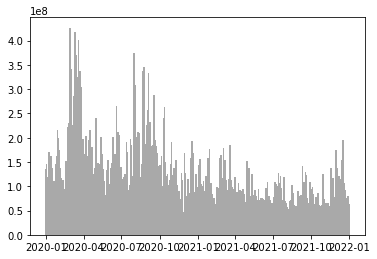

In [12]:
vol = aapl_df['Volume']

vol_plot = plt.bar(date, vol, width=4, color='darkgrey')
vol_plot

<BarContainer object of 505 artists>

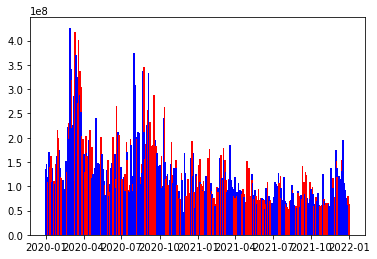

In [13]:
col = aapl_df['color']

vol_col_plot = plt.bar(date, vol, width=4, color=col)
vol_col_plot

<BarContainer object of 505 artists>

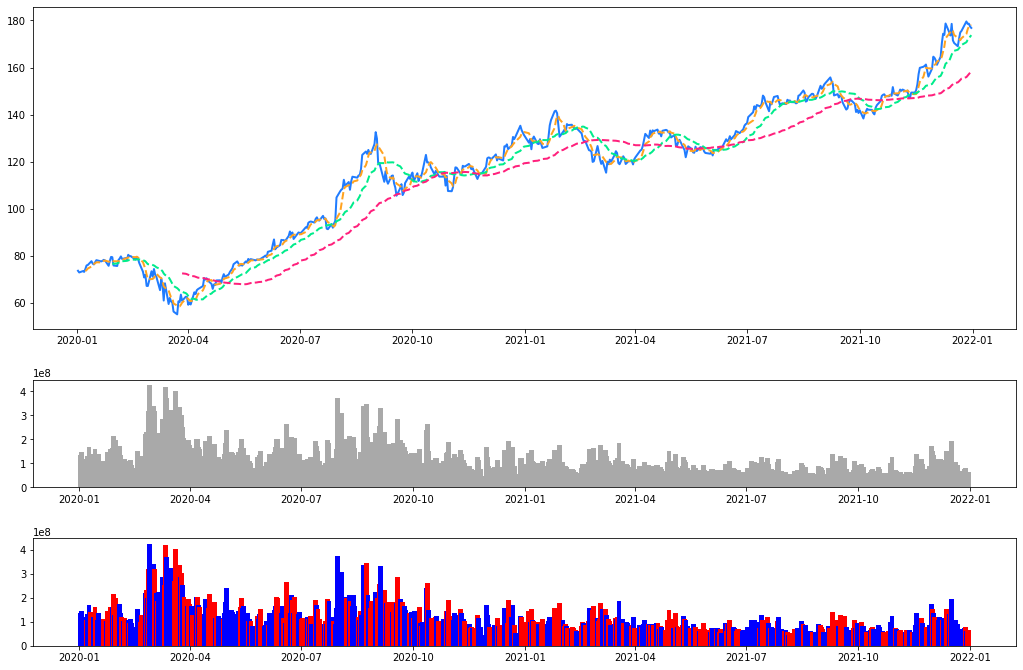

In [14]:
plt.rc('figure', figsize=(15, 10))

fig, axes = plt.subplots(
    3, 
    1, 
    gridspec_kw={'height_ratios': [3, 1, 1]} 
)

fig.tight_layout(pad=3)

# subplot 1
plot_close_price = axes[0]
for ma, ma_info in mov_avg.items():
    column_name = "MA for %s days" %(str(ma_info['Range']))    
    plot_close_price.plot(
        date, aapl_df[column_name], 
        color=ma_info['Color'], label=ma, linewidth=2, linestyle=ma_info['linestyle'],
    )

# subplot 2
plot_vol = axes[1]
plot_vol.bar(date, vol, width=4, color='darkgrey')

# subplot 3
vol_col_plot = axes[2]
vol_col_plot.bar(date, vol, width=4, color=col)